# Metodo dei Momenti per i dati della stazione di Pian di Fedaia (diga)

### Il metodo dei momenti consiste nell'uguagliare i momenti del campione con i momenti della popolazione.

In [1]:
import os
import math
from pandas import *
import pandas as pd
from datetime import datetime
%matplotlib inline
import matplotlib.pyplot as plt

from scipy.stats import genextreme,gumbel_r
from numpy import linspace
import numpy as np
import random

from statsmodels.distributions.empirical_distribution import ECDF

In [2]:
os_DatiFedaia=os.getcwd()
os.chdir(os_DatiFedaia)

In [3]:
data=pd.read_csv('DatiFedaia.csv')

In [4]:
map(datetime,data['Anno'])
data=data.set_index('Anno')

In [5]:
data

,1h,3h,6h,12h,24h
Anno,,,,,
1919,NaN,NaN,NaN,NaN,NaN
1920,NaN,NaN,NaN,NaN,NaN
1921,NaN,NaN,NaN,NaN,NaN
1922,NaN,NaN,NaN,NaN,NaN
1923,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2006,NaN,NaN,NaN,NaN,NaN
2007,12.6,32.2,43.8,48.6,57.0
2008,40.0,50.8,61.2,83.4,91.8


### Si settano i grafici

In [6]:
SMALL_SIZE=15
MEDIUM_SIZE=20
BIGGER_SIZE=30
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

### Viene calcolata la media dei dati

In [7]:
means=data.mean()

Text(0, 0.5, 'Rainfall (mm)')

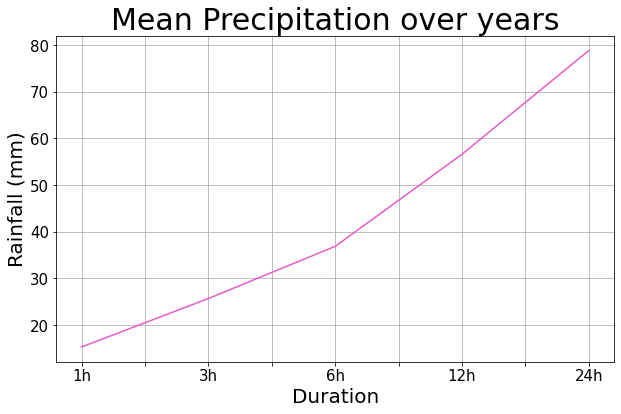

In [8]:
ax=means.plot(figsize=(10,6),color=(random.random(), random.random(), random.random()))
ax.grid(True)
ax.set_title('Mean Precipitation over years')
ax.set_xlabel('Duration')
ax.set_ylabel('Rainfall (mm)')

### Viene calcolata la varianza dei dati

In [9]:
variances=data.var()

Text(0, 0.5, 'Rainfall Variance (mm$^2$)')

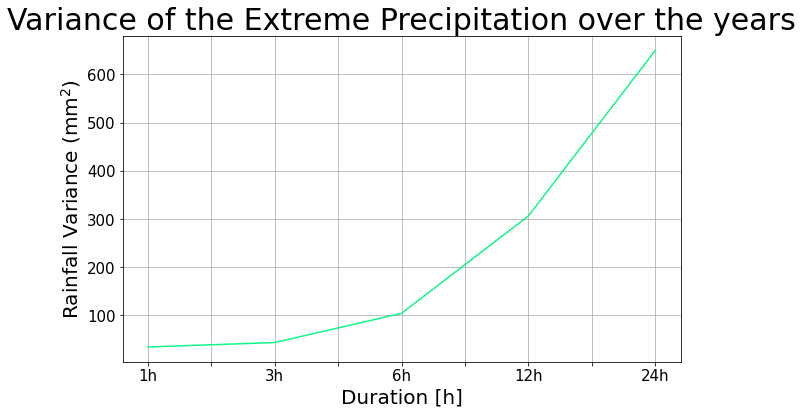

In [10]:
ax=variances.plot(figsize=(10,6),color=(random.random(), random.random(), random.random()))
ax.grid(True)
ax.set_title('Variance of the Extreme Precipitation over the years')
ax.set_xlabel('Duration [h]')
ax.set_ylabel('Rainfall Variance (mm$^2$)')

### Viene calcolato lo scarto quadratico medio e se ne fa il rapporto con la media

In [11]:
stds=data.std()
cv=data.std()/means

Text(0, 0.5, 'Variability')

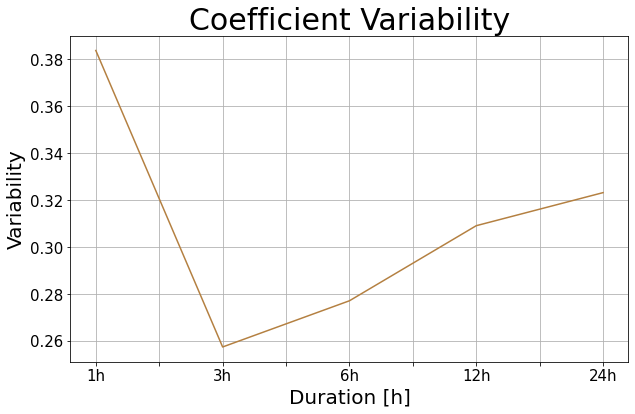

In [12]:
asf=cv.plot(figsize=(10,6),color=(random.random(), random.random(), random.random()))
asf.grid(True)
asf.set_title('Coefficient Variability')
asf.set_xlabel('Duration [h]')
asf.set_ylabel('Variability')

### Si definisce la funzione g che calcola i parametri relativi al metodo dei momenti

In [13]:
EulerGamma=0.57721566490153286060651209008240243 #costante di Eulero-Mascheroni
def g(m,s):
    return pd.DataFrame([m-math.sqrt(6)/math.pi*EulerGamma*s, math.sqrt(6)/math.pi*s],index=["a","b"])

In [14]:
abs_m=g(means,stds)
abs_m.to_pickle("abs_m")
abs_m

,1h,3h,6h,12h,24h
a,12.659236,22.712616,32.271924,48.746973,67.396004
b,4.579033,5.155363,7.965556,13.646262,19.873747


In [15]:
def gumbel(x,abs_d,col):
    return np.exp(-np.exp(-(x-abs_d[col]["a"])/abs_d[col]["b"]))

### Viene definito lo spazio lineare 

In [16]:
minimo=min(data.min()) #7.2

mass=max(data.max()) #132.6

t_rain=np.linspace(0,170,100)

### Questa funzione crea un dataframe per graficare le curve di Gumbel calcolate con i parametri dei momenti

In [17]:
lst=['1h','3h','6h','12h','24h']
def bbb(t_r,abs_a):
    g=[]
    for i in lst:
        g.append(gumbel(t_r,abs_a,i))
    
    gb=pd.DataFrame(g).T
    gb.index=t_r
    gb.columns=lst
    return gb
#gb

In [18]:
import random
colors={}
for i in lst:
    colore=(random.random(), random.random(), random.random())
    colors.update({i:colore})

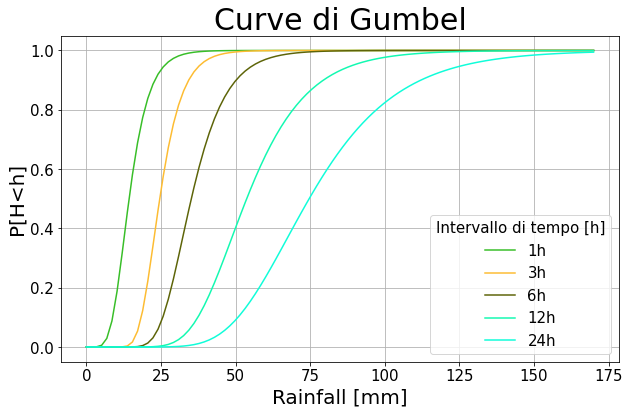

In [19]:
gb=bbb(t_rain,abs_m)
ax=gb.plot(figsize=(10,6),color=[colors['1h'],colors['3h'],colors['6h'],colors['12h'],colors['24h']])
ax.set_title('Curve di Gumbel')
ax.set_xlabel('Rainfall [mm]')
ax.set_ylabel('P[H<h]')
ax.grid(True)
ax.legend (title= "Intervallo di tempo [h]")

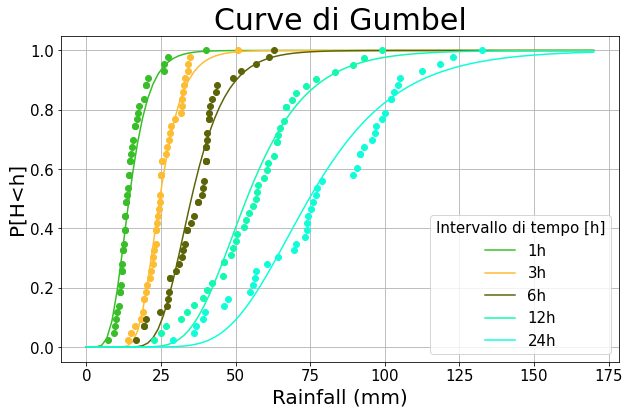

In [20]:
ax=gb.plot(figsize=(10,6),color=[colors['1h'],colors['3h'],colors['6h'],colors['12h'],colors['24h']])
ecdf={}
for i in lst:
    ecdf.update({i:ECDF(data[i].dropna())})
    ax.plot(data[i].dropna(),ecdf[i](data[i].dropna()),'o',c=colors[i])
ax.set_title('Curve di Gumbel')
ax.set_xlabel('Rainfall (mm)')
ax.set_ylabel('P[H<h]')
ax.grid(True)
ax.legend (title= "Intervallo di tempo [h]")